<a href="https://colab.research.google.com/github/shubham-k01/TSF_DataScience_Task1/blob/main/Prediction_using_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code written by: Shubham Kurunkar


**Importing all the requires modules**

We are going to make use of various modules such as numpy,pandas,matplotlib and scikit-learn to perform this task

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the data**

In [ ]:
link='http://bit.ly/w-data'
data=pd.read_csv(link)

**Exploring the data**

In [ ]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.shape

(25, 2)

**Visualising the data**

Text(0, 0.5, 'Scores')

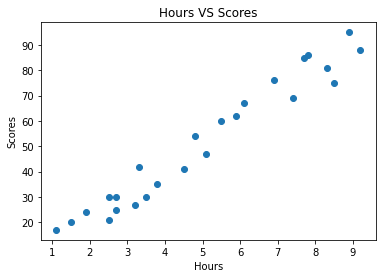

In [ ]:
plt.scatter(data['Hours'],data['Scores'])
plt.title("Hours VS Scores")
plt.xlabel('Hours')
plt.ylabel('Scores')

**Extracting chunks of data for creating training and test dataset**

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

**Creating a Linear Regression model and training it**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


**

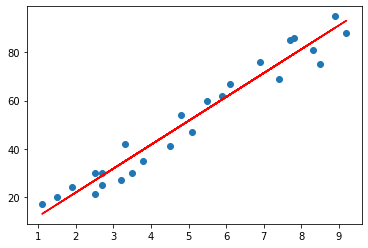

In [ ]:

line = regressor.coef_*x+regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line,color='red');


In [ ]:
p=regressor.predict(X_test)
print("Hours :",X_test)
print("Predicted Scores: ",p)

Hours : [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Predicted Scores:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
df=pd.DataFrame({'Actual':y_test,"Predicted":p})

In [ ]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
hours = np.array([9.25])
own_pred = regressor.predict(hours.reshape(-1,1))
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = [9.25]
Predicted Score = 93.69173248737539


The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, p)) 

Mean Absolute Error: 4.183859899002982



The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs


In [ ]:
print("Mean squared error: ",metrics.mean_squared_error(y_test, p))

Mean squared error:  21.598769307217456
